<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#ИАД" data-toc-modified-id="ИАД-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ИАД</a></span><ul class="toc-item"><li><span><a href="#Нахождение-количества-игр-по-годам" data-toc-modified-id="Нахождение-количества-игр-по-годам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Нахождение количества игр по годам</a></span></li><li><span><a href="#Исследование-продаж-по-платформам" data-toc-modified-id="Исследование-продаж-по-платформам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Исследование продаж по платформам</a></span></li><li><span><a href="#Выявление-потенциально-прибыльных-платформ-за-актуальный-период-(с-2012г.)" data-toc-modified-id="Выявление-потенциально-прибыльных-платформ-за-актуальный-период-(с-2012г.)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выявление потенциально прибыльных платформ за актуальный период (с 2012г.)</a></span></li><li><span><a href="#Построение-графика-«ящик-с-усами»-по-глобальным-продажам-игр-в-разбивке-по-платформам" data-toc-modified-id="Построение-графика-«ящик-с-усами»-по-глобальным-продажам-игр-в-разбивке-по-платформам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам</a></span></li><li><span><a href="#Исследование-влияния-отзывов-критиков-и-пользователей-на-продажи,-на-примере-одной-популярной-платформы" data-toc-modified-id="Исследование-влияния-отзывов-критиков-и-пользователей-на-продажи,-на-примере-одной-популярной-платформы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Исследование влияния отзывов критиков и пользователей на продажи, на примере одной популярной платформы</a></span></li><li><span><a href="#Исследование-влияния-отзывов-критиков-и-пользователей-на-продажи-и-на-других-платформах" data-toc-modified-id="Исследование-влияния-отзывов-критиков-и-пользователей-на-продажи-и-на-других-платформах-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Исследование влияния отзывов критиков и пользователей на продажи и на других платформах</a></span></li><li><span><a href="#Исследование-распределения-игр-по-жанрам-и-выявление-самых-прибыльных-из-них" data-toc-modified-id="Исследование-распределения-игр-по-жанрам-и-выявление-самых-прибыльных-из-них-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Исследование распределения игр по жанрам и выявление самых прибыльных из них</a></span></li></ul></li><li><span><a href="#Составление-портрета-пользователя-для-каждого-региона" data-toc-modified-id="Составление-портрета-пользователя-для-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портрета пользователя для каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Анализ факторов успешности видеоигр

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np
from matplotlib import pylab as plt
from scipy import stats as st

Скрыт импорт рабочего датасета с целью соблюдения политики конфиденциальности ЯП


In [3]:
data.info()
print('Пропуски в данных :\n', data.isna().sum())
print('Явные дубликаты: ', data.duplicated().sum())
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Пропуски в данных :
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14530,DokiDoki Majo Shinpan! 2,DS,2008.0,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,NaN
4024,Dragon Ball Z: Supersonic Warriors 2,DS,2005.0,Fighting,0.13,0.02,0.32,0.02,66.0,7.6,E10+
6280,Guitar Hero Live,PS3,2015.0,Misc,0.11,0.12,0.00,0.04,NaN,5.1,T
12224,Lucian Bee's: Justice Yellow / Evil Violet,PS2,2010.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
26,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,3.43,5.35,5.32,1.18,77.0,7.1,E
12583,MLB Power Pros 2008,DS,2008.0,Sports,0.06,0.00,0.00,0.00,70.0,tbd,E
13594,Go Go Ackman 3,SNES,1995.0,Platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3070,Lollipop Chainsaw,PS3,2012.0,Action,0.27,0.20,0.11,0.08,67.0,7.1,M
7340,BloodRayne,XB,2002.0,Shooter,0.16,0.05,0.00,0.01,76.0,7.5,M
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


**Вывод:** В данных присутствуют проблемы:
+ Есть пропущенные значения
+ Регистр столбцов
+ Не все типы данных подходящего типа
+ В данных отсутствуют явные дубликаты

## Подготовка данных

In [5]:
#Приведем название столбцов в нижний регистр
data.columns = data.columns.str.lower()
data.head(10)    

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
#Кол-во пропусков:
print('Пропуски до удаления в некоторых столбцах:\n', data.isna().sum())


#Удалим  строки с пропусками в name, genre, year_of_release :
data = data.dropna(subset=['name', 'genre', 'year_of_release' ]).reset_index(drop=True)



Пропуски до удаления в некоторых столбцах:
 name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [7]:
#Заменим пропуски в столбце rating:
not_null_rating = data[data['rating'].notnull()]
not_null_rating.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
11,Mario Kart DS,DS,2005.0,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E
13,Wii Fit,Wii,2007.0,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
15,Wii Fit Plus,Wii,2009.0,Sports,9.01,8.49,2.53,1.77,80.0,7.4,E


In [8]:
#Заполним часть пропущенных рейтингов, рейтингами этих же игр, для которых рейтинг известен:

#Функция для заполнения:
col = 'rating'
def fill(row, **kwargs):
    fill_col = col
    rows = not_null_rating[not_null_rating['name'] == row['name']]
    if len(rows) > 0:
        return rows.iloc[0][fill_col]
    return row[fill_col]

data.loc[data['rating'].isnull(), 'rating'] = data.apply(fill, axis=1)

print('Кол-во пропусков в rating после заполнение известным рейтингом этой же игры:', len(data.query('rating.isnull()')))

Кол-во пропусков в rating после заполнение известным рейтингом этой же игры: 6259


In [9]:
#Заполним оставшиеся прпуски маркером 'UnKnown':

data['rating'] = data['rating'].fillna('UnKnown')

data['rating'].isna().sum()

0

In [10]:
#Замена типов данных на более подходящие:
#name, platform, genre - на String
#year_of_release - на int
#user_score- на float

data[['name', 'platform', 'genre']] =(
data[['name', 'platform', 'genre']].astype('string')      
) 

data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='signed')

data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce') #С заменой tbd на NaN

print(data.dtypes)

#Удалять строки с пропусками в столбцах critic_score, user_score не нужно, т.к там релевантные данные 


name                string
platform            string
year_of_release      int16
genre               string
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


In [11]:
#Новый столбец с суммарной стоимостью:
data['total_sale'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,UnKnown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,UnKnown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,UnKnown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,UnKnown,28.31


**Вывод:**
 + В результате предобработки устранили некоторые очевидные проблемы в данных.

## ИАД

### Нахождение количества игр по годам

<AxesSubplot: xlabel='год', ylabel='количество'>

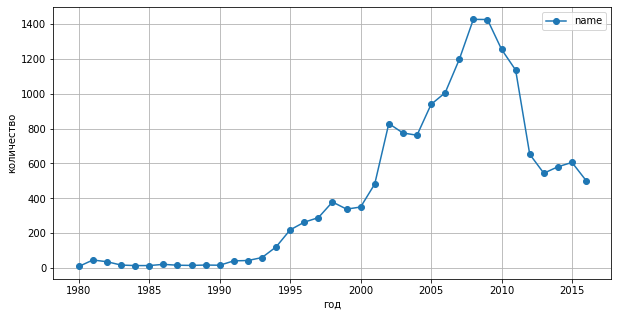

In [12]:
data.pivot_table(index='year_of_release', values = 'name', aggfunc='count')\
    .plot(style='o-', figsize=(10, 5), grid=True, xlabel='год', ylabel='количество')
   

**Вывод:**
+ С 2000 наблюдается существенное увеличение выпуска компьютерных игр.
+ Пик выпуска игр пришелся на 2008-2009 г., после чего наблюдается стабильное уменьшение их выпуска.
+ С 2000г. начинается быстрый рост выпуска игр и продолжается до 2008г., далее с 2009г. начинается стабильное снижение выпуска игр, и с 2012г. наблюдается стабильное НЕ СНИЖЕНИЕ выпуска новых игр---> можно взять за релевантный период 2012-2016гг.

### Исследование продаж по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте
распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [13]:
top_platforms = (data.pivot_table(index='platform', values='total_sale', aggfunc='sum')
                .sort_values(by='total_sale', ascending=False)
                )
                           
top_platforms.head(10)


,total_sale
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [14]:
#Выбираем 6 Топ-платформ:
top_6_platforms = [i for i in top_platforms[:6].index]
top_6_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

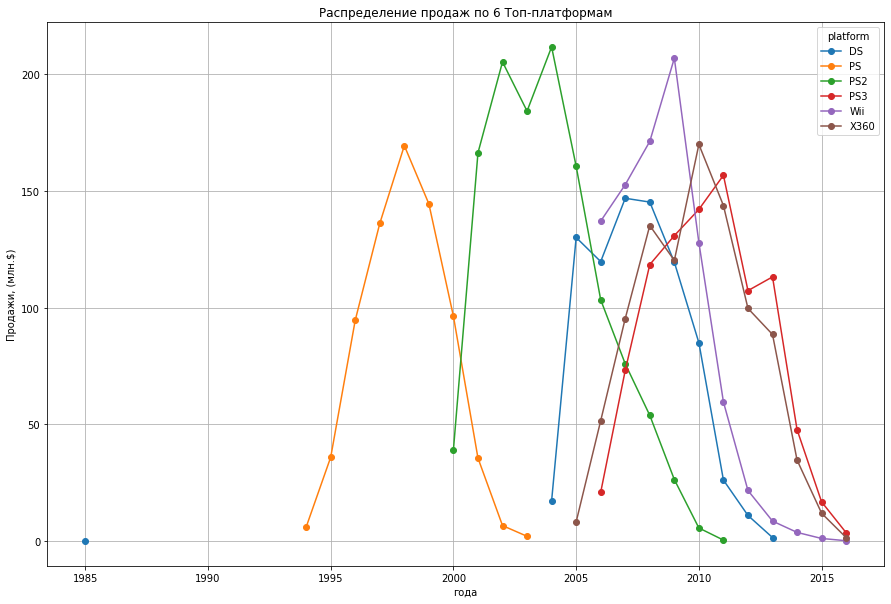

In [15]:
#Построим графики суммарной продажи для каждой из 6-и платформ:
sales_top_6_platforms = (data.query('platform in @top_6_platforms')
                             .pivot_table(index='year_of_release', columns='platform', values='total_sale', aggfunc='sum')
                             .plot(figsize=(15, 10), style='-o', grid=True, legend=True)
                             .set(title='Распределение продаж по 6 Топ-платформам', xlabel='года', ylabel='Продажи, (млн.$)')
                             )
plt.show()


In [16]:
#Определим характериный срок "жизни" Топ-платформ:


platform_life_time = (data.query('platform in @top_6_platforms')
                     .pivot_table(index=['platform', 'year_of_release'], values='total_sale', aggfunc='sum')
                     .reset_index()
                     .pivot_table(index='platform', values='year_of_release', aggfunc='count')
                     )


display(platform_life_time)

print('Среднее время нахождения платформы на рынке: ', platform_life_time.median())



,year_of_release
platform,
DS,11
PS,10
PS2,12
PS3,11
Wii,11
X360,12


Среднее время нахождения платформы на рынке:  year_of_release    11.0
dtype: float64


**Вывод:** 
+ Средний срок нахождения платформы на рынке - 11 лет. А далее либо выходит новая версия ее же, либо платформа перестает быть популярной и уходит в небытие. 

### Выявление потенциально прибыльных платформ за актуальный период (с 2012г.)

In [17]:
#Поместим данные за актуальны период в новую таблицу:
actual_data = data.query('year_of_release >= 2012')
actual_data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sale
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,UnKnown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,UnKnown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,UnKnown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


In [18]:
#Кол-во уникальных платформ в отрезке данных за актуальный период:
actual_data['platform'].nunique()

11

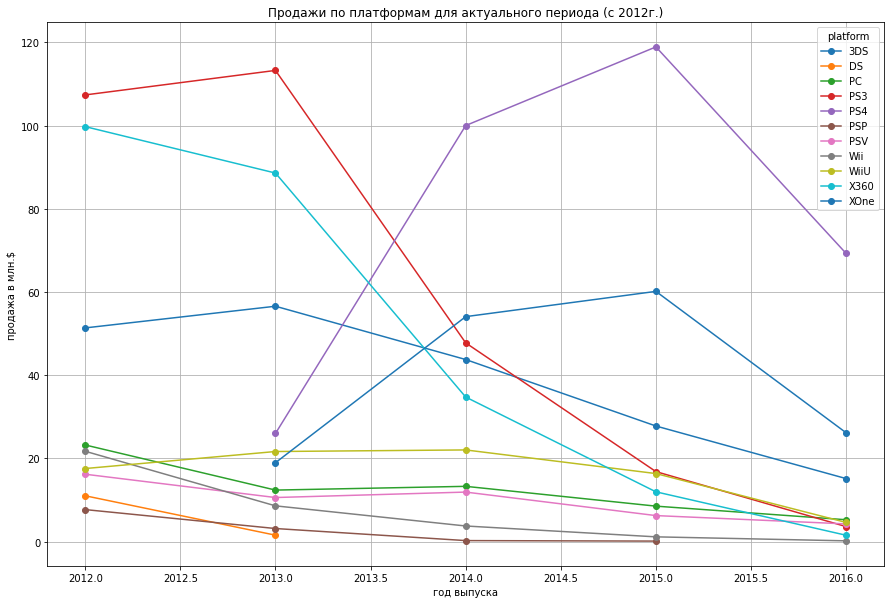

In [19]:
#Исследуем, какие платформы лидируют по продажам, какие из них растут и падают:

(actual_data.pivot_table(index='year_of_release', columns = 'platform', values='total_sale', aggfunc='sum')
            .plot(figsize=(15, 10), style='-o', grid=True, legend=True) 
            .set(xlabel='год выпуска',
                 ylabel = 'продажа в млн.$',
                 title = 'Продажи по платформам для актуального периода (с 2012г.)')
             
)
   
plt.show()

In [20]:
# Сгруппируем данные по продажм за 2016 г., чтобы предположить, какие будут перспективные в плане заработка в 2017:

(actual_data.query('year_of_release == 2016')
    .pivot_table(index='platform', values='total_sale', aggfunc='sum').
    sort_values('total_sale', ascending=False)
)

,total_sale
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


**Вывод:** 
+ По графику видно, что до 2015г. продажи существенно росли только у двух платформ: XOne и PS4. После 2015г. наблюдается спад продаж для всех платформ. 
+ Согласно графика и численной сортировки, две наиболее перспективные платформы в 2017г. станут XOne и PS4.

### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

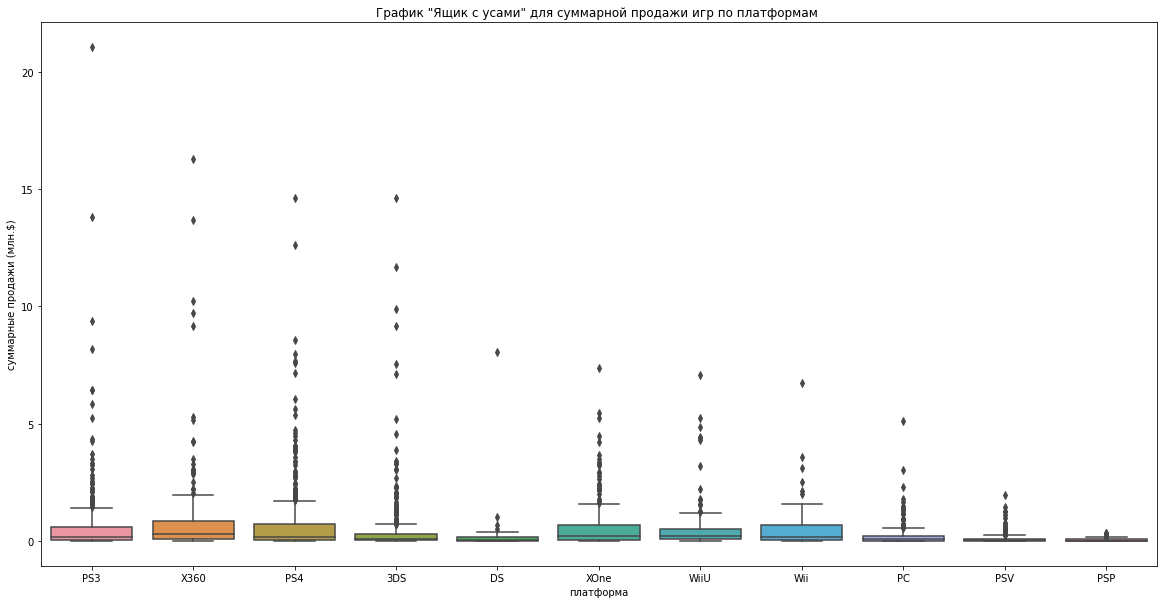

In [21]:
#Построим боксплоты для платформ:
plt.figure(figsize=(20,10))
(sns.boxplot(data=actual_data, x='platform', y='total_sale')
    .set(xlabel='платформа',
         ylabel = 'суммарные продажи (млн.$)',
         title = 'График "Ящик с усами" для суммарной продажи игр по платформам ' )
)
plt.show()


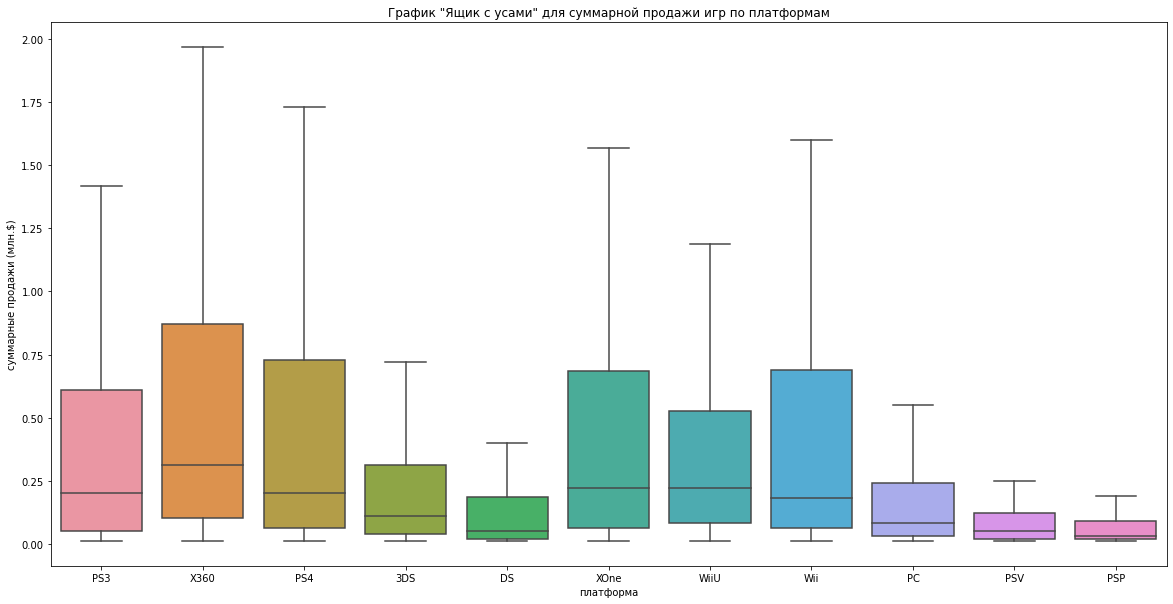

In [22]:
#Видим большое кол-во выбросов, избавимся от них:
plt.figure(figsize=(20, 10))
(sns.boxplot(data=actual_data, x='platform', y='total_sale', showfliers=False )
    .set(xlabel='платформа',
         ylabel = 'суммарные продажи (млн.$)',
         title = 'График "Ящик с усами" для суммарной продажи игр по платформам')

)

plt.show()
 

**Вывод:**
+ Анализируя сводную таблицу и 'ящики с усами', видим, что разброс по продажам довольно большой и в данных много выбросов, 
но они довольно редки (медианы графиков не стремятся к длинному "хвосту" высоких значений).
+ С точки зрения расположнеия медианы(средние продажи) и 75% процентиля, интересны платформы Х360, PS4, XOne, Wii. 

### Исследование влияния отзывов критиков и пользователей на продажи, на примере одной популярной платформы

Корреляция ОЦЕНОК ПОЛЬЗОВАТЕЛЕЙ и общих продаж:  0.006163978646213326
Корреляция ОЦЕНОК КРИТИКОВ и общих продаж:  0.3605734888507336


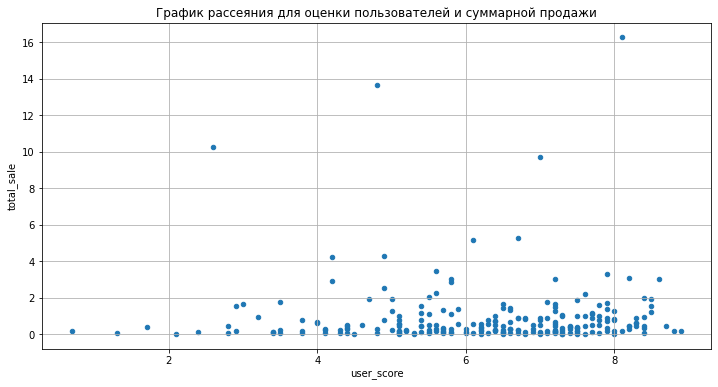

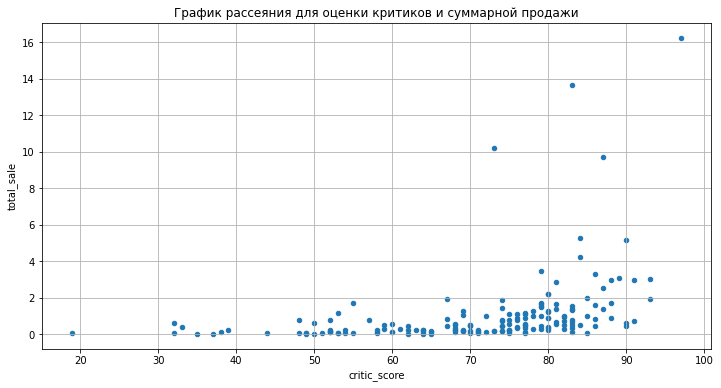

In [23]:
#Срез для популярной платформы X360:
data_X360 = actual_data.query('platform == "X360"')
data_X360.head(10)

#Графики рассеяния для user_score и total_sale и critic_score и total_sale:
(data_X360.plot.scatter(x='user_score', y='total_sale', figsize=(12,6), grid=True)
    .set(title='График рассеяния для оценки пользователей и суммарной продажи'))

(data_X360.plot.scatter(x='critic_score', y='total_sale', figsize=(12,6), grid=True)
    .set(title='График рассеяния для оценки критиков и суммарной продажи'))

#Найдем коэффициент корреляции между оценками пользователей и критиков и общими продажами:

print('Корреляция ОЦЕНОК ПОЛЬЗОВАТЕЛЕЙ и общих продаж: ', data_X360['user_score'].corr(data_X360['total_sale']))

print('Корреляция ОЦЕНОК КРИТИКОВ и общих продаж: ', data_X360['critic_score'].corr(data_X360['total_sale']))

**Вывод:** 
+ Связи между оценками пользователей и выбором игр судя по коэфф. корреляции ОЧЕНЬ СЛАБАЯ.
+ Влияние оценок критиков на продажи чуть больше влияния оценок пользователей, но по-прежнему ОЧЕНЬ МАЛА.
+ Для подтверждения тенденции рассмотри также и другие платформы ниже.


### Исследование влияния отзывов критиков и пользователей на продажи и на других платформах

[-0.06892505328279412,
 0.11283121360773771,
 -0.031957110204556376,
 0.22207843643390884]

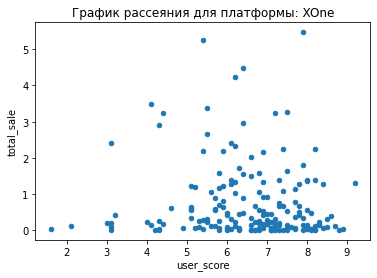

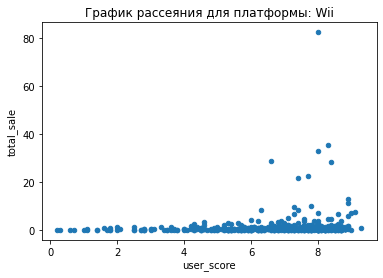

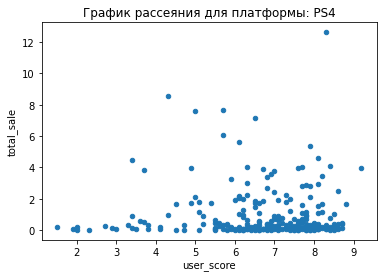

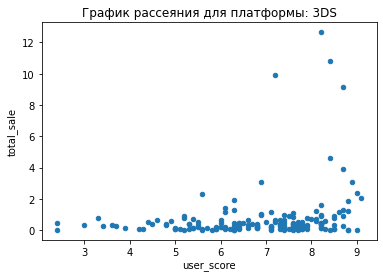

In [24]:
#Для подтверждения характера влияния оценок на выбор и покупку игр и на других платформах, исследуем еще несколько платформ:
#Построим в цикле диаграммы рассеяния и найдем коэффициенты корреляции:
corr_coef_user = [] #Для оценок пользователей 

for platform in ['XOne','Wii','PS4','3DS']:
    data_p = data[data['platform'] == platform]
    data_p.plot.scatter(x='user_score', y='total_sale')
    plt.title('График рассеяния для платформы: '+ platform)
    corr_coef_user.append(data_p['total_sale'].corr(data_p['user_score']))
    
corr_coef_user

**Корреляция между оценкой пользователей и продажами очень слабая**

[0.41699832800840175,
 0.17790728577594905,
 0.406567902061781,
 0.34873973059848346]

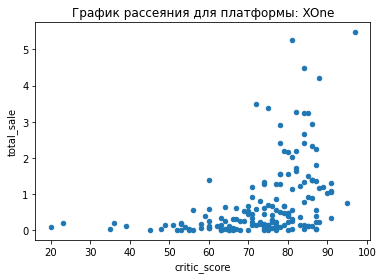

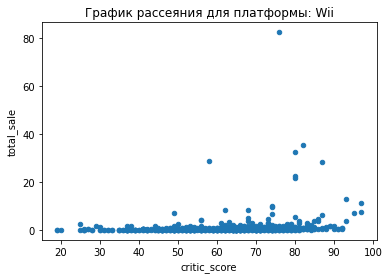

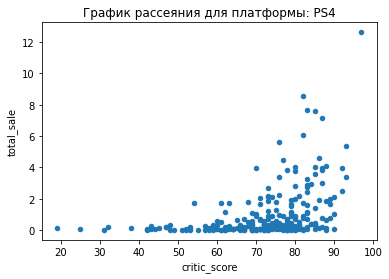

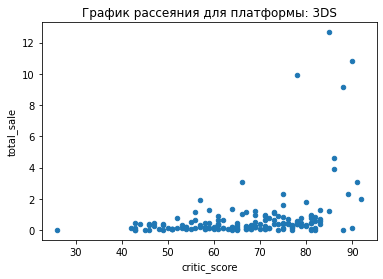

In [25]:
corr_coef_critic = []

for platform in ['XOne','Wii','PS4','3DS']:
    data_p = data[data['platform'] == platform]
    data_p.plot.scatter(x='critic_score', y='total_sale')
    plt.title('График рассеяния для платформы: '+ platform)
    corr_coef_critic.append(data_p['total_sale'].corr(data_p['critic_score']))
    
corr_coef_critic

**Корреляция между оценкой критиков и продажами в диапазоне от очень слабой до слабой.**

**Вывод:** 
+ Что и следовало доказать - влияние оценок критиков сильнее влияет на выбор игр, чем оценка пользователей.
+ Однако  судя по очень слабой корреляции, нельзя утверждать, что высокие оценки критиков приводят к высокой продаже компьютерных игр.

### Исследование распределения игр по жанрам и выявление самых прибыльных из них

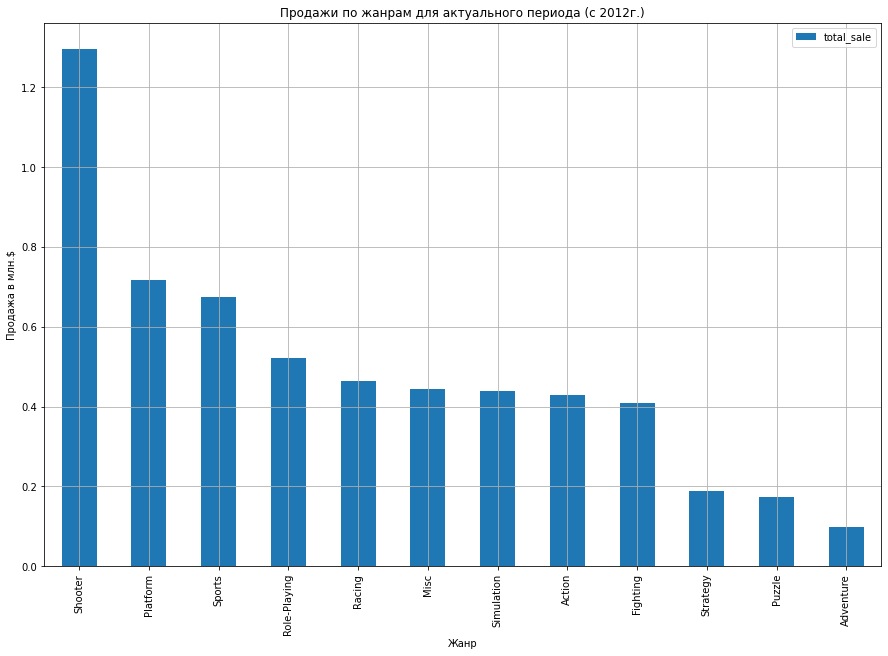

In [26]:
(actual_data
    .pivot_table(index='genre', values='total_sale')
    .sort_values('total_sale', ascending=False)
    .plot(y='total_sale', figsize=(15, 10), style='-o', kind='bar', grid=True, legend=True) 
    .set(xlabel='Жанр',
         ylabel ='Продажа в млн.$',
         title = 'Продажи по жанрам для актуального периода (с 2012г.)')
)

plt.show()

**Вывод:**
+ Наиболее популярными являются жанры шутер, платформеры, спорт и гонки, наименее популярными - головоломки и 'бродилки'.

## Составление портрета пользователя для каждого региона

In [27]:
#Массив с интересующими регионами:
region_list = ['na_sales', 'eu_sales', 'jp_sales']

print(actual_data[region_list].sum())

na_sales    590.97
eu_sales    506.82
jp_sales    192.58
dtype: float64


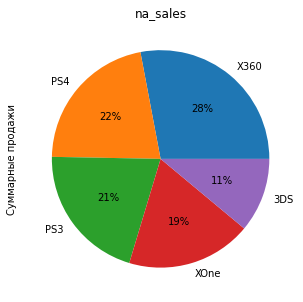

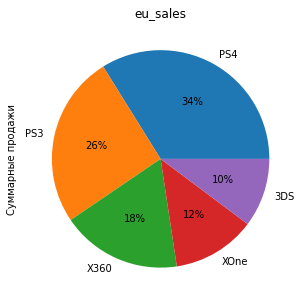

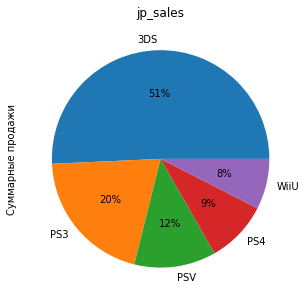

In [28]:
#Выделим самые популярные платформы (Топ-5):
for region in region_list:
    (actual_data.pivot_table(index='platform', values=region, aggfunc='sum')
     .sort_values(region, ascending=False).head()
     .plot(kind='pie', y=region, figsize=(5, 5), autopct='%1.0f%%', title=region, legend=False)
     .set(ylabel='Суммарные продажи')
    )
plt.show()

В Европе и Америке популярны платформы X360 и PS.
В Японии более половины спроса приходится на платформу 3DS.

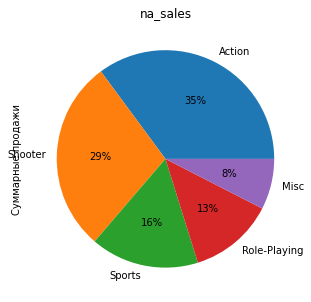

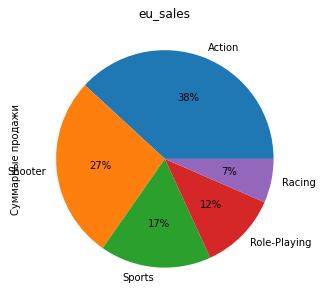

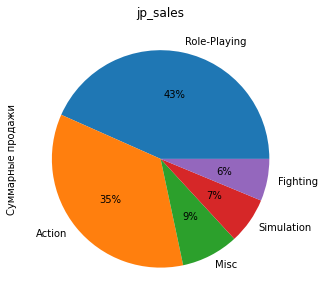

In [29]:
#Выделим самые популярные жанры (Топ-5):

for region in region_list:
    (actual_data.pivot_table(index='genre', values=region, aggfunc='sum')
     .sort_values(region, ascending=False).head()
     .plot(kind='pie', y=region, figsize=(5, 5), autopct='%1.0f%%', title=region, legend=False)
     .set(ylabel='Суммарные продажи')
    )

plt.show()

В Европе и Америке очень похожее распределение популярных жанров. Там лидируют Экшены и Шутеры. В Японии предпочтение отдают Экшенам и РПГ.

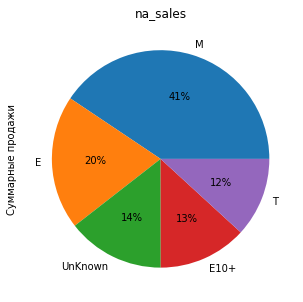

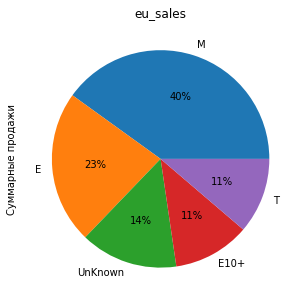

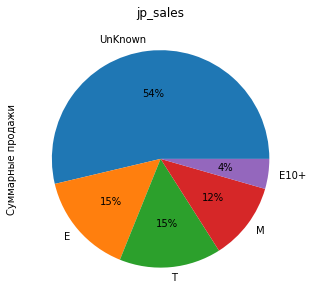

In [30]:
#Посмотрим распределение продаж в зависимости от рейтинга игры:

for region in region_list:
    (actual_data.pivot_table(index='rating', values=region, aggfunc='sum')
     .sort_values(region, ascending=False).head()
     .plot(kind='pie', y=region, figsize=(5, 5), autopct='%1.0f%%', title=region, legend=False)
     .set(ylabel='Суммарные продажи')
    )
    
plt.show()

В Европе и Америке хорошо продаются игры с рейтингом для взрослых и для всех.
В Японии хорошо продаются игры с неизвестным рейтингом и рейтингом для всех.

**Вывод:** 
+ Поведение пользователей в Европе и Америке очень похоже и сильно отличается от него же в Японии.
+ В Европе и Америке лидируют платформы X360 и PS, жанры - Шутер и Экшн, игры с рейтингом для взрослых и для всех.
+ В Японии лидирует платформа 3DS, жанры - Экшн и РПГ, игры с неизвестным рейтингом и рейтингом для всех. 

## Проверка гипотез

 + Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 + Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
+ Н0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
+ Н1: Средние пользовательские рейтинги платформ Xbox One и PC различны

In [38]:
#Заполним пропуски в столбцах для корректной работы st.ttest:
actual_data['user_score'] = actual_data['user_score'].fillna(-1)
actual_data['critic_score'] = actual_data['critic_score'].fillna(-1)

C:\Users\user\AppData\Local\Temp\ipykernel_16576\3687457608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data['user_score'] = actual_data['user_score'].fillna(-1)
C:\Users\user\AppData\Local\Temp\ipykernel_16576\3687457608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_data['critic_score'] = actual_data['critic_score'].fillna(-1)


In [32]:
pc = actual_data.query('platform == "PC" and user_score != -1 ')
xone = actual_data.query('platform == "XOne" and user_score != -1 ')   
                       
print('Дисперсия выборки pc:', np.var(pc['user_score']))
print('Дисперсия выборки xone:', np.var(xone['user_score']))

Дисперсия выборки pc: 2.7569952398906565
Дисперсия выборки xone: 1.8965188383045533


In [33]:
alpha = 0.05

results = st.ttest_ind(
    pc['user_score'],
    xone['user_score'],
    equal_var=False  
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [34]:
#Найдем средний рейтинг платформ:
print('Среднее рейтинга пользователей платформы PC:', pc['user_score'].mean())

print('Среднее рейтинга пользователей платформы XOne:', xone['user_score'].mean())


Среднее рейтинга пользователей платформы PC: 6.4286407766990274
Среднее рейтинга пользователей платформы XOne: 6.521428571428572


Видно, что средний рейтинг исследуемых платформ отличаются слабо, но полученное значение p-value говорит о том, что с вероятностью в почти 55% такое различие можно получить случайно. Такая вероятность слишком большая, чтобы сделать вывод о сильном отличии между средними рейтингами.
Следовательно не удалось опровергнуть нулевую гипотезу.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**
 + Н0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.
 + Н1: Средние пользовательские рейтинги жанров Action и Sports различны.

In [35]:
action = actual_data.query('genre == "Action" and user_score != -1')
sport = actual_data.query('genre == "Sports" and user_score != -1')

print('Дисперсия выборки action:', np.var(action['user_score']))
print('Дисперсия выборки sport:', np.var(sport['user_score']))


Дисперсия выборки action: 1.8854720340439228
Дисперсия выборки sport: 3.007388297172914


In [36]:
alpha = 0.05

results = st.ttest_ind(
    action['user_score'],
    sport['user_score'],
    equal_var=False  
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


In [37]:
#Найдем средний рейтинг жанров:
print('Среднее рейтинга пользователей жанра Action:', action['user_score'].mean())

print('Среднее рейтинга пользователей жанра Sports:',sport['user_score'].mean())

Среднее рейтинга пользователей жанра Action: 6.825047801147227
Среднее рейтинга пользователей жанра Sports: 5.455897435897437


Видно, что средний рейтинг жанров Action и Sports различаются и вероятность случайно получить такое отличие очень маленькая. Т.е. отвергаем нулевую гипотезу.

## Общий вывод

+ С 2009 года наблюдается спад продаж в индустрии компьютерных игр.
+ Средний срок жизни игровых платформ 11 лет.
+ Наиболее популярные и перспективные в 2017 платформы – это и Xbox One и Sony PlayStation 4.
+ С точки зрения 75% процентиля продаж(приближается к 1 млн. $)  игр для каждой платформы, наиболее успешные - X360, PS4, XOne и Wii. Это стоит учитывать при выборе платформы для разработки игры.
+ На выбор той или иной игры НЕ влияет оценка пользователей, оценка критиков влияет, НО СЛАБО и не является решающим фактором в выборе.
+ В целом среди всех жанров выбор потребителей падает на Шутеры, Платформеры и Спорт, что вполне логично из-за их динамичности и насыщенности.
+ В США и Европе лучше всего продаются Шутеры и Экшны.
+ Больше всего продаж приходится на игры с рейтингом для взрослых и для всех.
+ В Японии лучше всего продаются жанры - Экшн и РПГ, игры с неизвестным рейтингом и рейтингом для всех.
+ Объем продаж в Японии, по сравнению с Северной Америкой и Европой, меньше в 2,5 раза.

Исходя из исследования - выгодно разрабатывать игры для рынка Европы и Америки на перспективных платформах PS4 и XOne в жанрах Action/Shooter.

Игровой рынок Японии спецефичен по платформам (лидирует 3DS) и жанрам, а также не очень большой в целом, и суммарная прибыль компьютерных игр здесь в 2,5 раза меньше, чем в Северной Америке и Европе.